### Distribution of Cohort Analysis data

In [2]:
import sqlite3
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load environment variables
load_dotenv()
folder_directory = os.getenv("folder_path")

# Connect to the SQLite database
db_path = f"{folder_directory}/data/Analytics_Data_Warehouse.db"
conn = sqlite3.connect(db_path)

# Read the table into a DataFrame
table_name = "cohort_analysis"  # Replace with your actual table name
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

# Close the database connection
conn.close()

# Convert CohortMonth to datetime if applicable
if "CohortMonth" in df.columns:
    df["CohortMonth"] = pd.to_datetime(df["CohortMonth"])

# Visualization of distributions

# Set the style for seaborn
sns.set(style="whitegrid")

# Histogram for 'account_balance'
plt.figure(figsize=(10, 6))
sns.histplot(df["account_balance"], bins=30, kde=True)
plt.title("Distribution of Account Balances")
plt.xlabel("Account Balance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Box plot for 'credit_score'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["credit_score"])
plt.title("Box Plot of Credit Scores")
plt.xlabel("Credit Score")
plt.tight_layout()
plt.show()

# Pair plot for selected numerical variables (if applicable)
selected_columns = ["age", "credit_score", "num_products"]
sns.pairplot(df[selected_columns])
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()

KeyError: 'account_balance'

<Figure size 1000x600 with 0 Axes>

### Visualization of Cohort Analysis

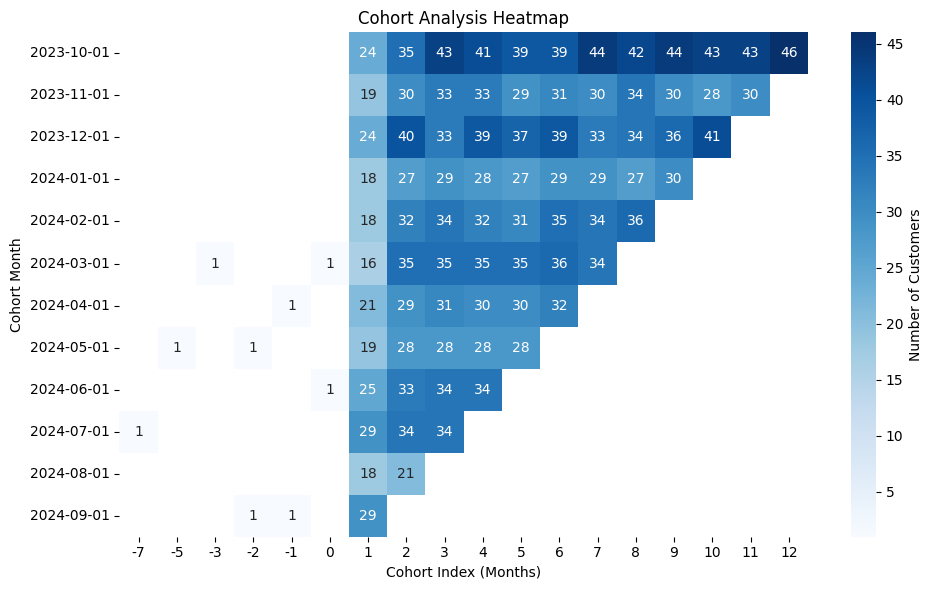

In [5]:
import sqlite3
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()
folder_directory = os.getenv("folder_path")

db_path = f"{folder_directory}/data/Analytics_Data_Warehouse.db"
conn = sqlite3.connect(db_path)

# Step 2: Read the table into a DataFrame
table_name = "cohort_analysis"  # Replace with your actual table name
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

# Step 3: Close the database connection
conn.close()


# Convert CohortMonth to datetime
df["CohortMonth"] = pd.to_datetime(df["CohortMonth"])

# Format CohortMonth to display only Year-Month
df["CohortMonth"] = df["CohortMonth"].dt.strftime("%Y-%m-01")

# Pivoting the DataFrame to get the cohort counts
cohort_counts_pivot = df.pivot(
    index="CohortMonth", columns="CohortIndex", values="customer_id"
)


# Visualization using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    cohort_counts_pivot,
    annot=True,
    fmt="g",
    cmap="Blues",
    cbar_kws={"label": "Number of Customers"},
)

# Adding titles and labels
plt.title("Cohort Analysis Heatmap")
plt.xlabel("Cohort Index (Months)")
plt.ylabel("Cohort Month")

# Show the plot
plt.tight_layout()
plt.show()

### Distribution of RFM Analysis data

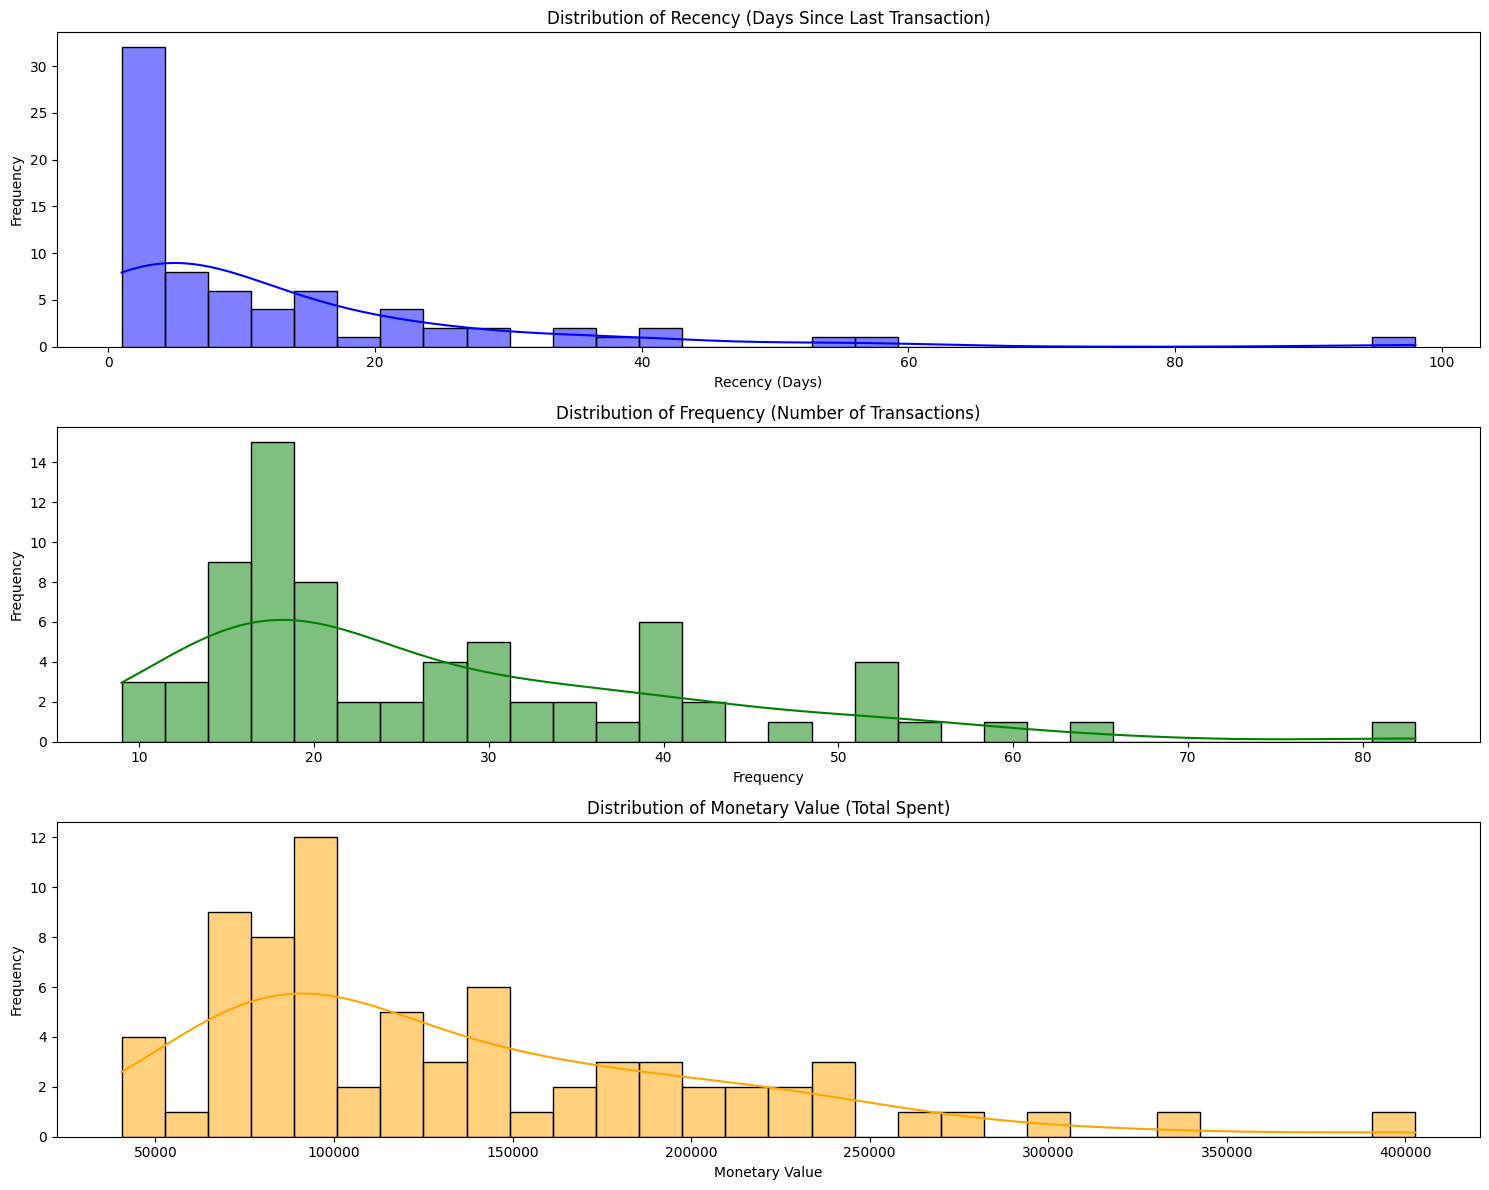

In [2]:
import sqlite3
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

load_dotenv()
folder_directory = os.getenv("folder_path")

customer_data_db_path = f"{folder_directory}/data/customer_data.db"
conn = sqlite3.connect(customer_data_db_path)

# SQL query to extract relevant data
query = """
    SELECT 
        c.customer_id,
        a.open_date,
        t.transaction_date,
        t.transaction_amount
    FROM 
        CUSTOMERS c
    JOIN 
        ACCOUNTS a ON c.customer_id = a.customer_id
    JOIN 
        TRANSACTIONS t ON a.account_id = t.account_id
    """

# Execute the query and load data into a DataFrame
RFM_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Convert date columns to datetime format
RFM_df["open_date"] = pd.to_datetime(RFM_df["open_date"], format="ISO8601")
RFM_df["transaction_date"] = pd.to_datetime(RFM_df["transaction_date"])

# Calculate Recency (days since last transaction)
snapshot_date = datetime.now()
RFM_df["Recency"] = (snapshot_date - RFM_df["transaction_date"]).dt.days

# Calculate Frequency and Monetary Value
RFM_transformed_df = (
    RFM_df.groupby("customer_id")
    .agg(
        Recency=("Recency", "min"),  # Minimum recency for each customer
        Frequency=("transaction_date", "count"),  # Count of transactions
        MonetaryValue=("transaction_amount", "sum"),  # Sum of transaction amounts
    )
    .reset_index()
)


plt.figure(figsize=(15, 12))

# Plot distribution of Recency (days since last transaction)
plt.subplot(3, 1, 1)
sns.histplot(RFM_transformed_df["Recency"], bins=30, kde=True, color="blue")
plt.title("Distribution of Recency (Days Since Last Transaction)")
plt.xlabel("Recency (Days)")
plt.ylabel("Frequency")

# Plot distribution of Frequency (number of transactions)
plt.subplot(3, 1, 2)
sns.histplot(RFM_transformed_df["Frequency"], bins=30, kde=True, color="green")
plt.title("Distribution of Frequency (Number of Transactions)")
plt.xlabel("Frequency")
plt.ylabel("Frequency")

# Plot distribution of Monetary Value (total spent)
plt.subplot(3, 1, 3)
sns.histplot(RFM_transformed_df["MonetaryValue"], bins=30, kde=True, color="orange")
plt.title("Distribution of Monetary Value (Total Spent)")
plt.xlabel("Monetary Value")
plt.ylabel("Frequency")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Visualization of RFM analysis

/var/folders/s5/3hrvhfb13ts920yrmjb8l0th0000gn/T/ipykernel_57512/1035041957.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/s5/3hrvhfb13ts920yrmjb8l0th0000gn/T/ipykernel_57512/1035041957.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


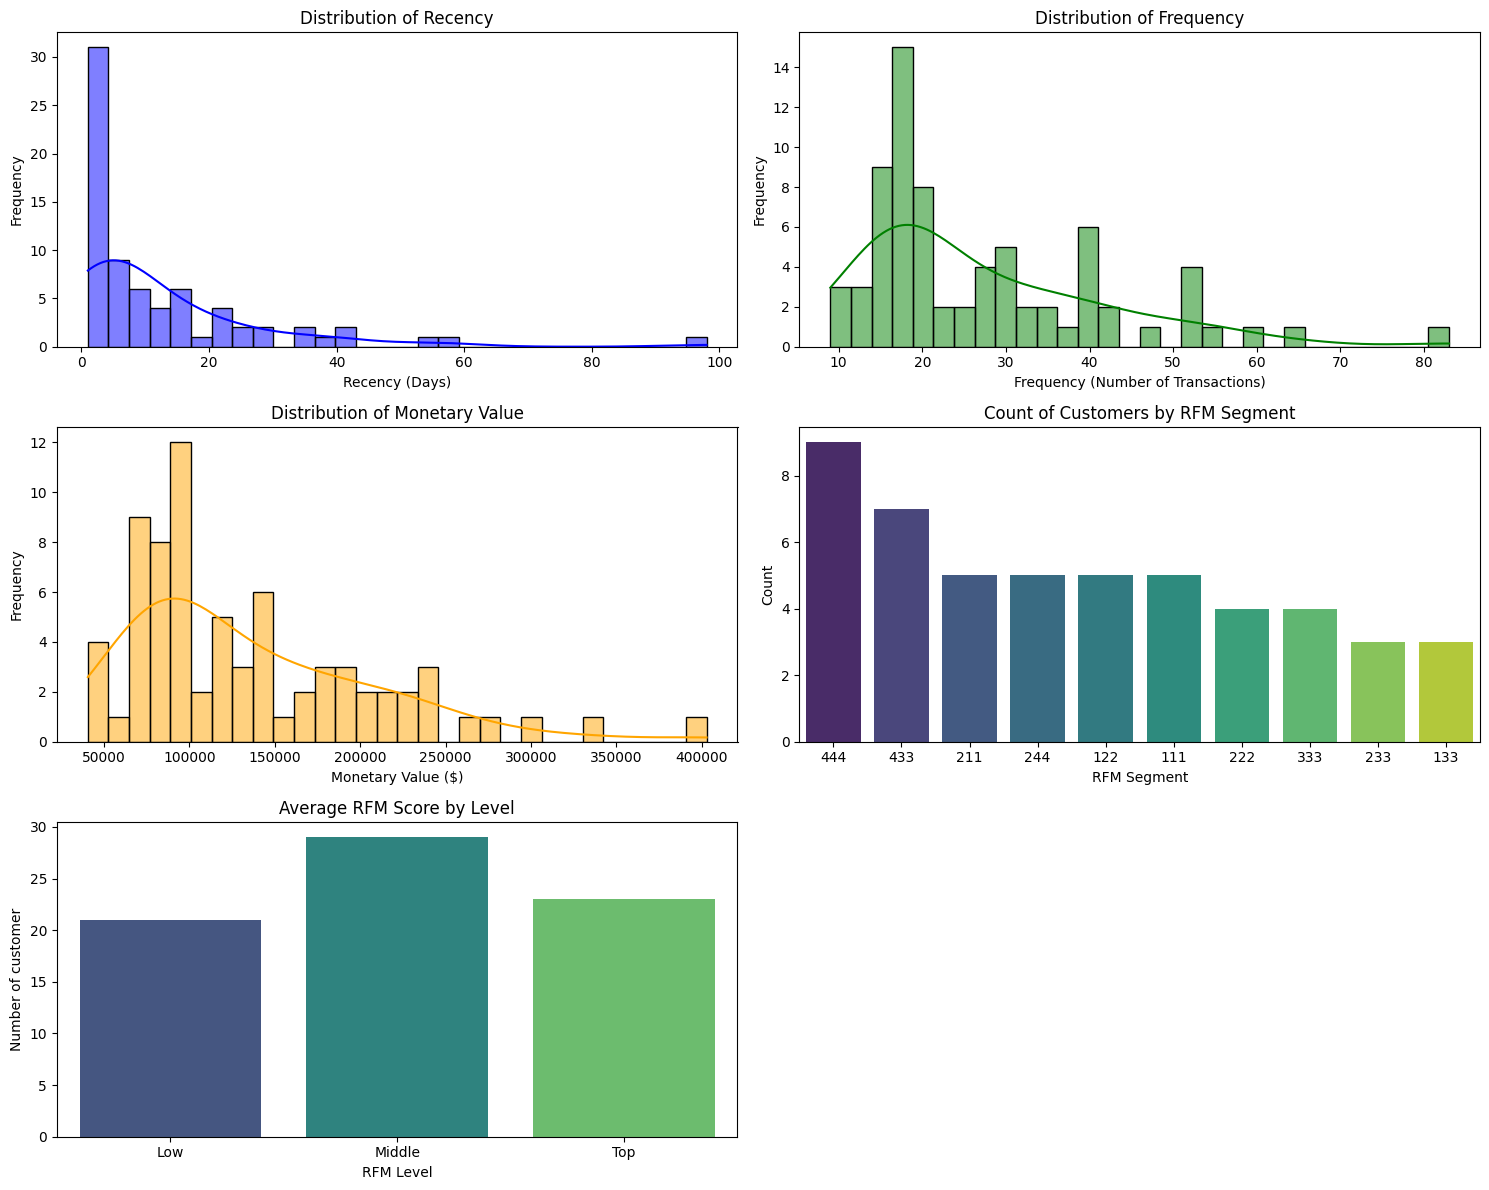

In [1]:
import sqlite3
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load environment variables
load_dotenv()
folder_directory = os.getenv("folder_path")

# Connect to the SQLite database
db_path = f"{folder_directory}/data/Analytics_Data_Warehouse.db"
conn = sqlite3.connect(db_path)

# Read the RFM analysis table into a DataFrame
table_name = "RFM_analysis"  # Replace with your actual table name
RFM_df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)

# Close the database connection
conn.close()

# Assigning RFM scores based on quantiles
r_labels = range(4, 0, -1)  # Recency labels (4 to 1)
f_labels = range(1, 5)  # Frequency labels (1 to 4)
m_labels = range(1, 5)  # Monetary labels (1 to 4)

# Create quartiles for Recency, Frequency, and MonetaryValue
RFM_df["R"] = pd.qcut(RFM_df["Recency"], q=4, labels=r_labels)
RFM_df["F"] = pd.qcut(RFM_df["Frequency"], q=4, labels=f_labels)
RFM_df["M"] = pd.qcut(RFM_df["MonetaryValue"], q=4, labels=m_labels)

# Create RFM Segment by concatenating R, F, M scores
RFM_df["RFM_Segment"] = RFM_df[["R", "F", "M"]].astype(str).agg("".join, axis=1)

# Calculate the RFM Score by summing R, F, M scores
RFM_df["RFM_Score"] = RFM_df[["R", "F", "M"]].sum(axis=1)


# Define rfm_level function to categorize customers based on their RFM Score
def rfm_level(df):
    if df["RFM_Score"] >= 10:
        return "Top"
    elif (df["RFM_Score"] >= 6) and (df["RFM_Score"] < 10):
        return "Middle"
    else:
        return "Low"


# Create a new variable RFM_Level
RFM_df["RFM_Level"] = RFM_df.apply(rfm_level, axis=1)

# Visualization

plt.figure(figsize=(15, 12))

# Plot distribution of Recency
plt.subplot(3, 2, 1)
sns.histplot(RFM_df["Recency"], bins=30, kde=True, color="blue")
plt.title("Distribution of Recency")
plt.xlabel("Recency (Days)")
plt.ylabel("Frequency")

# Plot distribution of Frequency
plt.subplot(3, 2, 2)
sns.histplot(RFM_df["Frequency"], bins=30, kde=True, color="green")
plt.title("Distribution of Frequency")
plt.xlabel("Frequency (Number of Transactions)")
plt.ylabel("Frequency")

# Plot distribution of Monetary Value
plt.subplot(3, 2, 3)
sns.histplot(RFM_df["MonetaryValue"], bins=30, kde=True, color="orange")
plt.title("Distribution of Monetary Value")
plt.xlabel("Monetary Value ($)")
plt.ylabel("Frequency")

# Assuming RFM_df is your DataFrame and 'RFM_Segment' is the column of interest
top_10_segments = RFM_df["RFM_Segment"].value_counts().head(10).index

plt.subplot(3, 2, 4)
sns.countplot(
    data=RFM_df,
    x="RFM_Segment",
    order=top_10_segments,
    palette="viridis",
    legend=False,
)
plt.title("Count of Customers by RFM Segment")
plt.xlabel("RFM Segment")
plt.ylabel("Count")

# Plot average RFM Score by RFM Level
plt.subplot(3, 2, 5)
avg_rfm_score_by_level = RFM_df.groupby("RFM_Level")["RFM_Score"].count().reset_index()
sns.barplot(
    data=avg_rfm_score_by_level,
    x="RFM_Level",
    y="RFM_Score",
    palette="viridis",
    legend=False,
)
plt.title("Average RFM Score by Level")
plt.xlabel("RFM Level")
plt.ylabel("Number of customer")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

 ### Load the Data and Display the First Few Rows

In [3]:
import pandas as pd
from dotenv import load_dotenv
import os
import logging
import sys
import sqlite3


logging.basicConfig(level=logging.INFO)

load_dotenv()
folder_directory = os.getenv("folder_path")

sys.path.append(folder_directory)
database_db_path = f"{folder_directory}/data/bank_customer_data.db"
# Connect to the SQLite database
conn = sqlite3.connect(database_db_path)

# Connect to the SQLite database
conn = sqlite3.connect(database_db_path)

# Load data from each table into DataFrames
customers = pd.read_sql_query("SELECT * FROM CUSTOMERS", conn)
addresses = pd.read_sql_query("SELECT * FROM ADDRESSES", conn)
accounts = pd.read_sql_query("SELECT * FROM ACCOUNTS", conn)
transactions = pd.read_sql_query("SELECT * FROM TRANSACTIONS", conn)
loans = pd.read_sql_query("SELECT * FROM LOANS", conn)
merchants = pd.read_sql_query("SELECT * FROM MERCHANTS", conn)
account_types = pd.read_sql_query("SELECT * FROM ACCOUNT_TYPES", conn)
campaigns = pd.read_sql_query("SELECT * FROM CAMPAIGNS", conn)
recipients = pd.read_sql_query("SELECT * FROM RECIPIENTS", conn)

# Display the first few rows of each table
print(customers.head())
print(addresses.head())
print(accounts.head())
print(transactions.head())
print(loans.head())
print(merchants.head())
print(account_types.head())
print(campaigns.head())
print(recipients.head())

   customer_id        customer_name    id_number  age  gender  num_products  \
0            1        Sally Lambert  557-67-7454   20  Female             5   
1            2           Tasha Levy  523-25-3539   42  Female             3   
2            3        Michael Perry  532-83-8069   35  Female             5   
3            4  Christina Stevenson  770-05-1771   50    Male             4   
4            5         Connie Klein  164-44-0447   66  Female             5   

   credit_score  loans_taken  
0           850            7  
1           295            1  
2           100            2  
3           393            1  
4           139            1  
   address_id  customer_id                       street              city  \
0           1            1              02782 Reed Burg          Ruizstad   
1           2            2          0540 Callahan Vista   South Justinton   
2           3            3    560 Scott Lodge Suite 634  East Charlesport   
3           4            4  661

### Summarize the Dataset with Descriptive Statistics

In [4]:
# Descriptive statistics for numerical columns in each DataFrame
customers_desc = customers.describe()
addresses_desc = addresses.describe(include="all")  # Include all for categorical data
accounts_desc = accounts.describe()
transactions_desc = transactions.describe()
loans_desc = loans.describe()
merchants_desc = merchants.describe(include="all")
account_types_desc = account_types.describe(include="all")
campaigns_desc = campaigns.describe()
recipients_desc = recipients.describe(include="all")

# Displaying descriptive statistics
print("Customers Descriptive Statistics:\n", customers_desc)
print("Addresses Descriptive Statistics:\n", addresses_desc)
print("Accounts Descriptive Statistics:\n", accounts_desc)
print("Transactions Descriptive Statistics:\n", transactions_desc)
print("Loans Descriptive Statistics:\n", loans_desc)
print("Merchants Descriptive Statistics:\n", merchants_desc)
print("Account Types Descriptive Statistics:\n", account_types_desc)
print("Campaigns Descriptive Statistics:\n", campaigns_desc)
print("Recipients Descriptive Statistics:\n", recipients_desc)

Customers Descriptive Statistics:
        customer_id         age  num_products  credit_score  loans_taken
count  1000.000000  1000.00000   1000.000000   1000.000000  1000.000000
mean    500.500000    44.71600      3.026000    380.139000     3.461000
std     288.819436    15.28676      1.400459    251.108485     2.263538
min       1.000000    18.00000      1.000000    100.000000     0.000000
25%     250.750000    32.00000      2.000000    120.750000     2.000000
50%     500.500000    45.00000      3.000000    335.000000     3.000000
75%     750.250000    58.00000      4.000000    580.250000     5.000000
max    1000.000000    70.00000      5.000000    850.000000     7.000000
Addresses Descriptive Statistics:
          address_id  customer_id           street         city          state  \
count   1000.000000  1000.000000             1000         1000           1000   
unique          NaN          NaN             1000          966             50   
top             NaN          NaN  02782

### Identify and Visualize Missing Values

In [5]:
# Check for missing values in each DataFrame
missing_customers = customers.isnull().sum()
missing_addresses = addresses.isnull().sum()
missing_accounts = accounts.isnull().sum()
missing_transactions = transactions.isnull().sum()
missing_loans = loans.isnull().sum()
missing_merchants = merchants.isnull().sum()
missing_account_types = account_types.isnull().sum()
missing_campaigns = campaigns.isnull().sum()
missing_recipients = recipients.isnull().sum()

# Create a DataFrame to summarize missing values
missing_summary = pd.DataFrame(
    {
        "Table": [
            "Customers",
            "Addresses",
            "Accounts",
            "Transactions",
            "Loans",
            "Merchants",
            "Account Types",
            "Campaigns",
            "Recipients",
        ],
        "Missing Values": [
            missing_customers[missing_customers > 0].sum(),
            missing_addresses[missing_addresses > 0].sum(),
            missing_accounts[missing_accounts > 0].sum(),
            missing_transactions[missing_transactions > 0].sum(),
            missing_loans[missing_loans > 0].sum(),
            missing_merchants[missing_merchants > 0].sum(),
            missing_account_types[missing_account_types > 0].sum(),
            missing_campaigns[missing_campaigns > 0].sum(),
            missing_recipients[missing_recipients > 0].sum(),
        ],
    }
)

print(missing_summary)

           Table  Missing Values
0      Customers               0
1      Addresses               0
2       Accounts               0
3   Transactions               0
4          Loans               0
5      Merchants               0
6  Account Types               0
7      Campaigns               0
8     Recipients               0


### Create Visualizations to Explore Key Variables

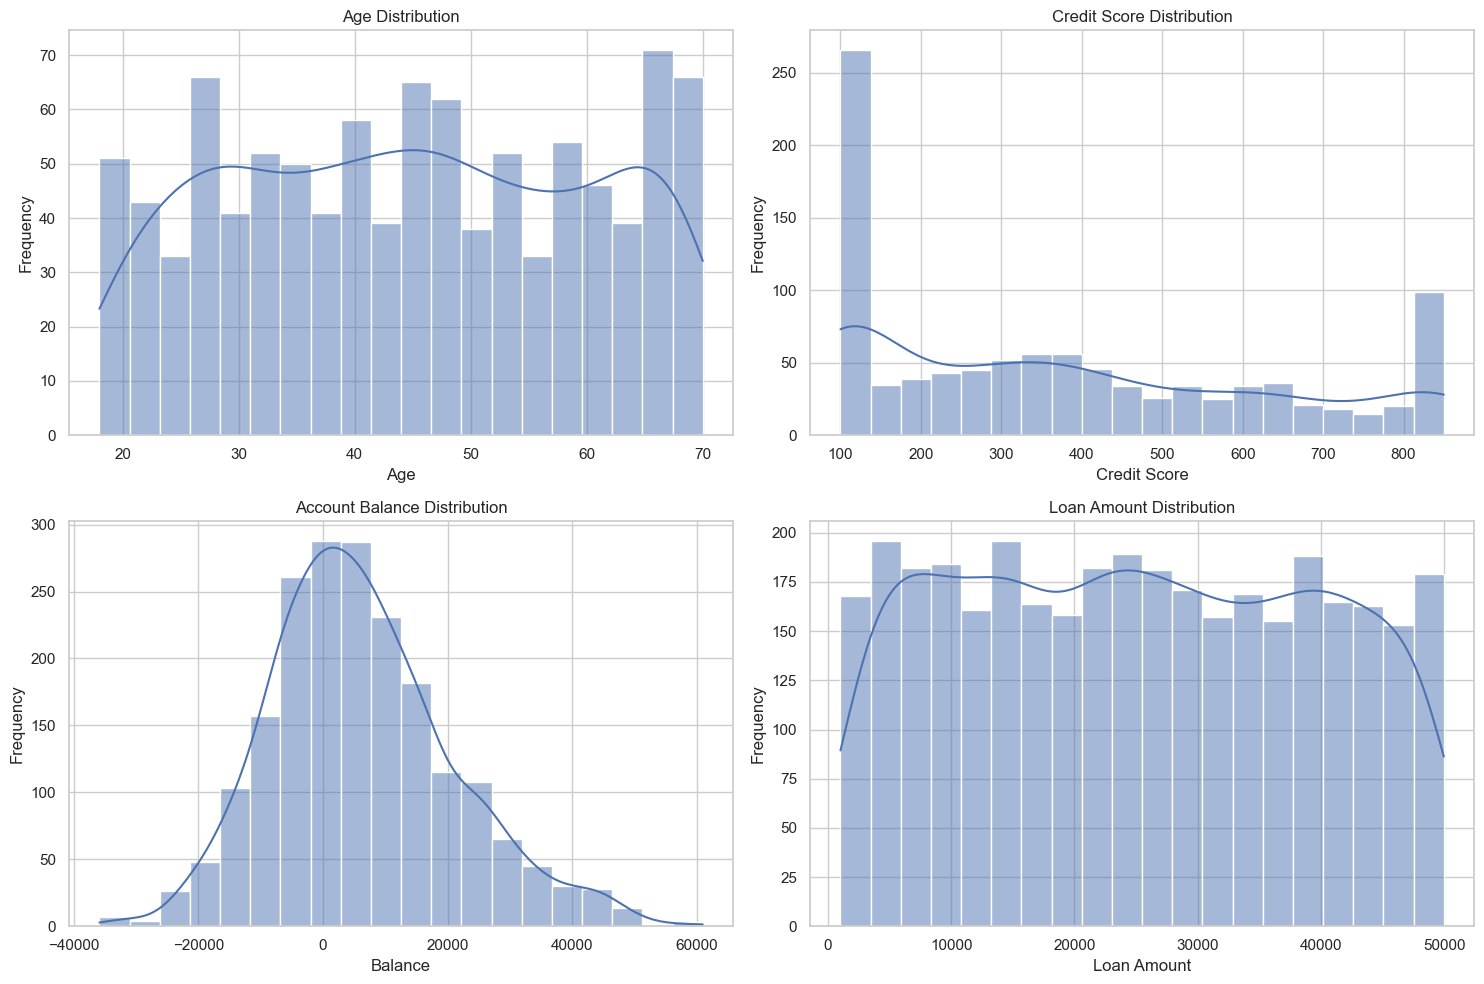

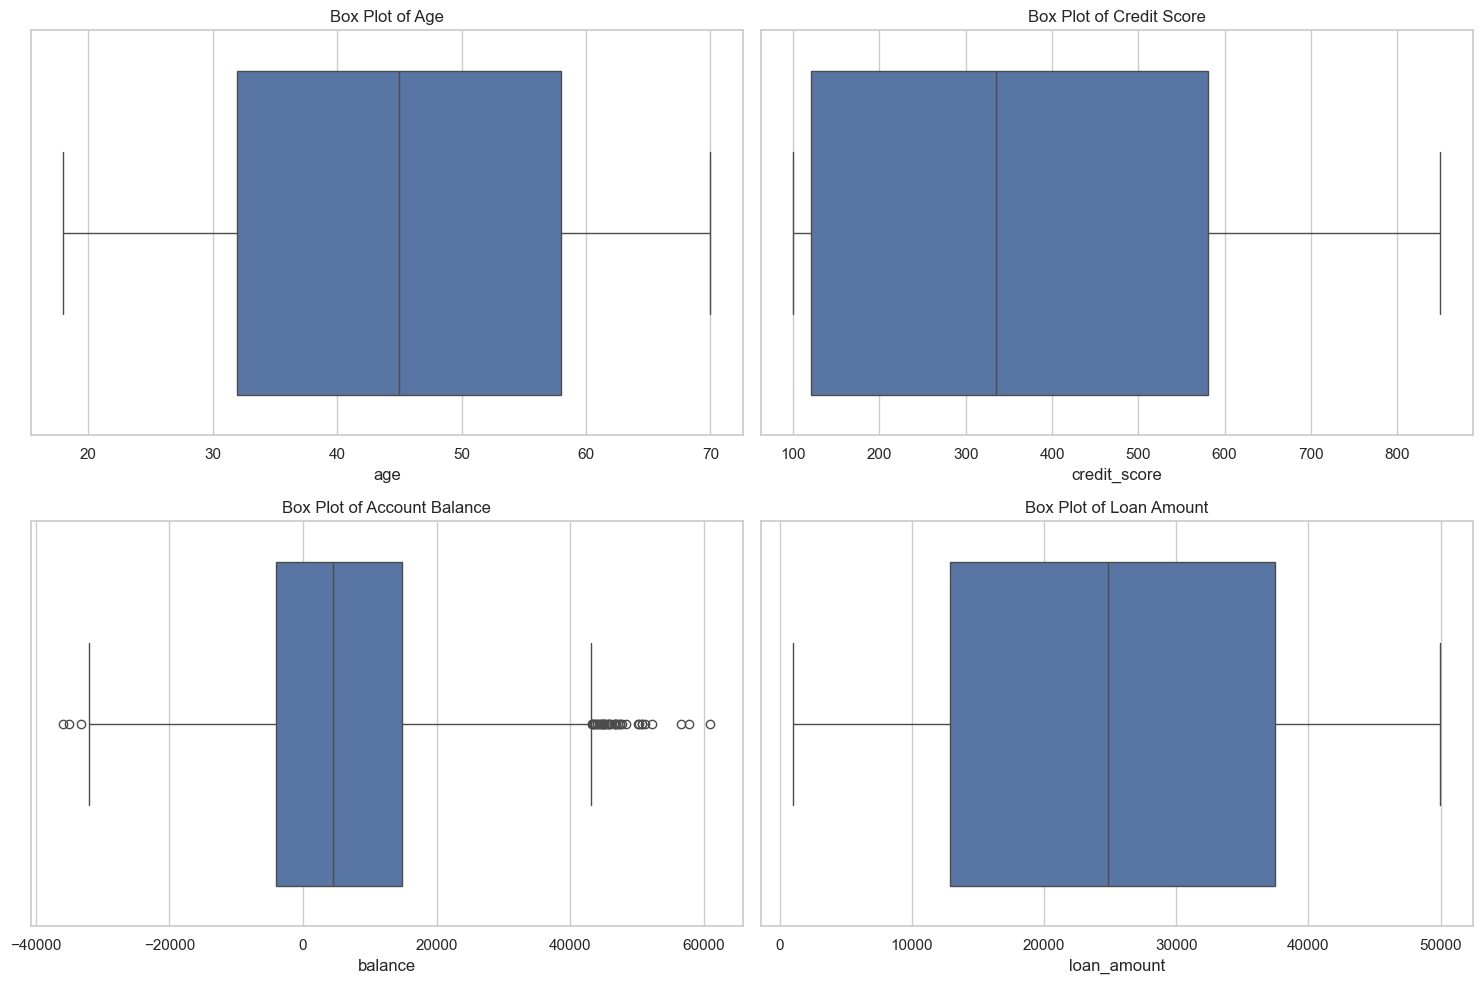

In [6]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for key numerical variables
plt.figure(figsize=(15, 10))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(customers["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Credit Score Distribution
plt.subplot(2, 2, 2)
sns.histplot(customers["credit_score"], bins=20, kde=True)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")

# Account Balance Distribution
plt.subplot(2, 2, 3)
sns.histplot(accounts["balance"], bins=20, kde=True)
plt.title("Account Balance Distribution")
plt.xlabel("Balance")
plt.ylabel("Frequency")

# Loan Amount Distribution
plt.subplot(2, 2, 4)
sns.histplot(loans["loan_amount"], bins=20, kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Box plots for key numerical variables
plt.figure(figsize=(15, 10))

# Box plot for Age
plt.subplot(2, 2, 1)
sns.boxplot(x=customers["age"])
plt.title("Box Plot of Age")

# Box plot for Credit Score
plt.subplot(2, 2, 2)
sns.boxplot(x=customers["credit_score"])
plt.title("Box Plot of Credit Score")

# Box plot for Account Balance
plt.subplot(2, 2, 3)
sns.boxplot(x=accounts["balance"])
plt.title("Box Plot of Account Balance")

# Box plot for Loan Amount
plt.subplot(2, 2, 4)
sns.boxplot(x=loans["loan_amount"])
plt.title("Box Plot of Loan Amount")

plt.tight_layout()
plt.show()

Insights from Distribution Visualizations
Age Distribution:
The histogram may show a normal distribution or skewness towards younger or older ages.
The box plot can reveal outliers in age data.
Credit Score Distribution:
A concentration of scores around certain values may indicate common credit profiles among customers.
Outliers in the box plot can highlight customers with exceptionally high or low credit scores.
Account Balance Distribution:
The histogram can indicate whether most customers have low or high balances.
The box plot will help identify any extreme values that may need further investigation.
Loan Amount Distribution:
Understanding the distribution of loan amounts can inform lending practices.
The box plot can show if there are customers taking out unusually large loans.

### Analyze Relationships Between Variables Using Correlation Matrices and Pair Plots

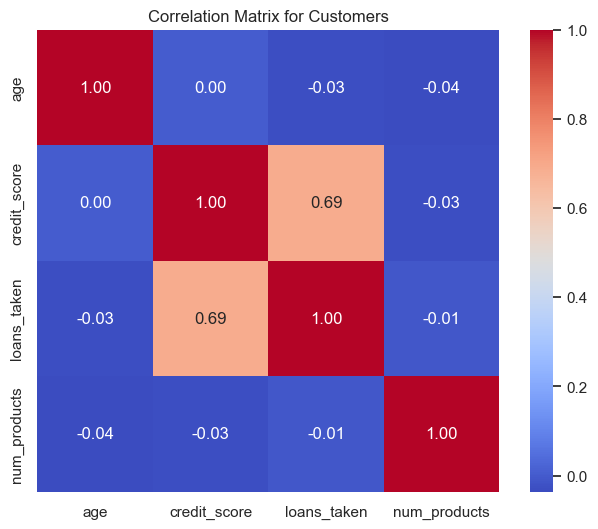

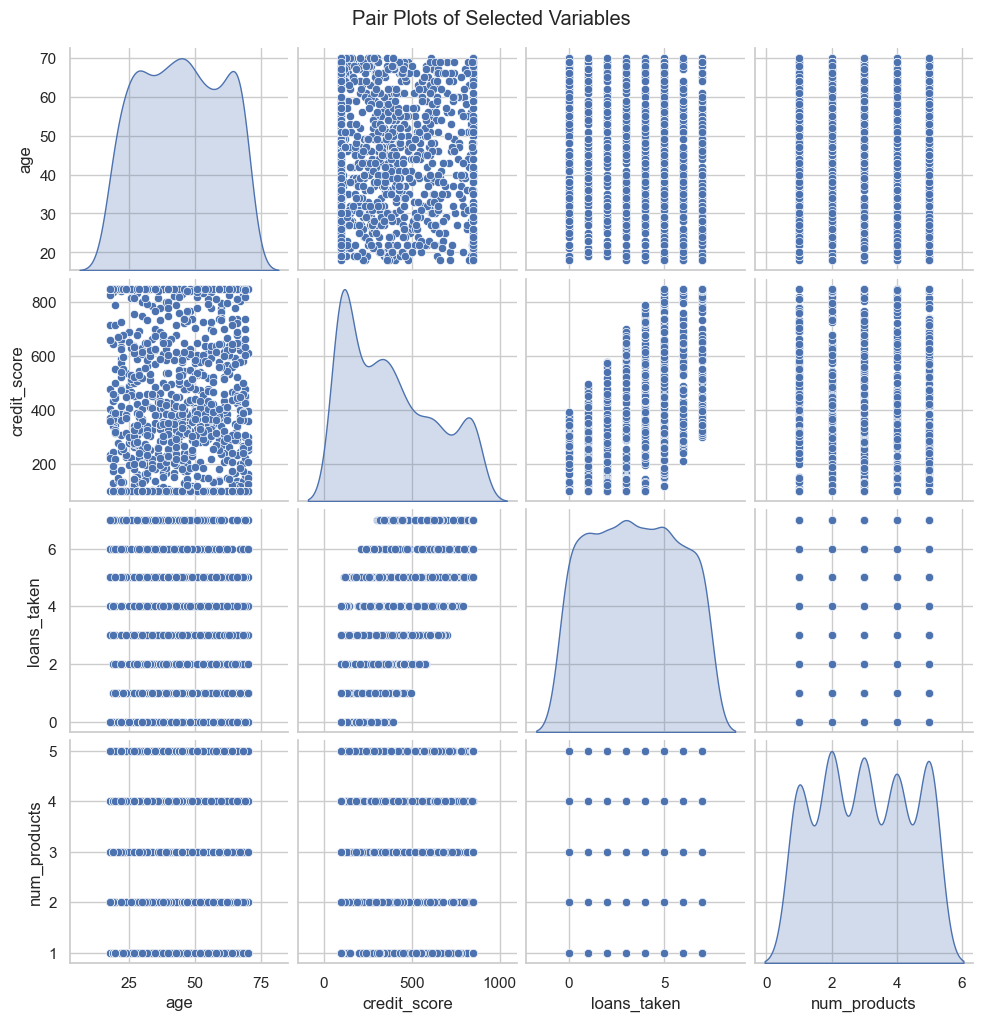

In [7]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = customers[
    ["age", "credit_score", "loans_taken", "num_products"]
].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix for Customers")
plt.show()

# Creating pair plots for selected numerical variables
sns.pairplot(
    customers[["age", "credit_score", "loans_taken", "num_products"]], diag_kind="kde"
)
plt.suptitle("Pair Plots of Selected Variables", y=1.02)
plt.show()